In [2]:
#file:///C:/Users/basak/Downloads/End_to_End_Data_Science%20(5).pdf
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree
from sklearn import metrics


In [3]:
#Kaggle API izin
#! pip install -q kaggle
#directory ve izin değiştirme
# ! mkdir ~/.kaggle
# ! cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d mirichoi0218/insurance -p Dataset
#unzip
# ! mkdir insurance
# ! unzip Dataset/insurance.zip -d insurance
from google.colab import files
files.upload()


Saving insurance.csv to insurance.csv


{'insurance.csv': b'age,sex,bmi,children,smoker,region,charges\r\n19,female,27.9,0,yes,southwest,16884.924\r\n18,male,33.77,1,no,southeast,1725.5523\r\n28,male,33,3,no,southeast,4449.462\r\n33,male,22.705,0,no,northwest,21984.47061\r\n32,male,28.88,0,no,northwest,3866.8552\r\n31,female,25.74,0,no,southeast,3756.6216\r\n46,female,33.44,1,no,southeast,8240.5896\r\n37,female,27.74,3,no,northwest,7281.5056\r\n37,male,29.83,2,no,northeast,6406.4107\r\n60,female,25.84,0,no,northwest,28923.13692\r\n25,male,26.22,0,no,northeast,2721.3208\r\n62,female,26.29,0,yes,southeast,27808.7251\r\n23,male,34.4,0,no,southwest,1826.843\r\n56,female,39.82,0,no,southeast,11090.7178\r\n27,male,42.13,0,yes,southeast,39611.7577\r\n19,male,24.6,1,no,southwest,1837.237\r\n52,female,30.78,1,no,northeast,10797.3362\r\n23,male,23.845,0,no,northeast,2395.17155\r\n56,male,40.3,0,no,southwest,10602.385\r\n30,male,35.3,0,yes,southwest,36837.467\r\n60,female,36.005,0,no,northeast,13228.84695\r\n30,female,32.4,1,no,southwe

In [63]:
ins = pd.read_csv("insurance.csv")

In [64]:
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


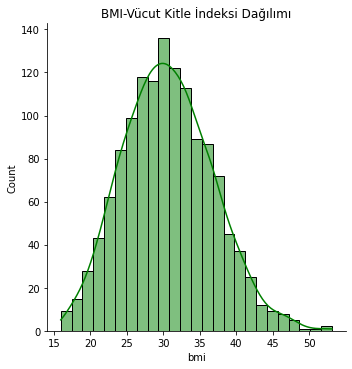

In [66]:
sns.displot(ins, x="bmi", kde= True, color= "g").set(title = "BMI-Vücut Kitle İndeksi Dağılımı");
#Normal gibi (Biraz sağdan çarpık *right skewed distribution*)

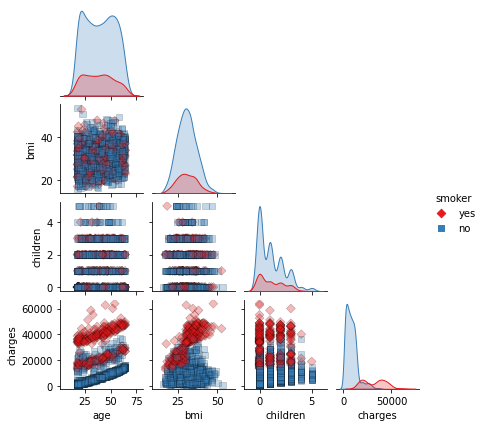

In [67]:
sns.pairplot(data=ins, height=1.5, hue="smoker",
             palette="Set1",plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor': 'k'}, markers=["D", "s"],
             corner=True);

In [68]:
ins["region"].value_counts()

##TODO
#https://pbpython.com/categorical-encoding.html

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [69]:
ins["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [70]:
ins["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [71]:
cleanup_ = {"region": {"southeast": 1, "southwest": 2, "northwest":3, "northeast":4},
            "sex": {"male": 0, "female": 1},
            "smoker": {"no":0, "yes":1} 
           }

ins = ins.replace(cleanup_)
ins.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,2,16884.92400
1,18,0,33.770,1,0,1,1725.55230
2,28,0,33.000,3,0,1,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [72]:
ins.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [73]:
def corr_Vars(data):
   corr = data.corr()
   mask = np.triu(np.ones_like(corr))
   f, ax = plt.subplots(figsize=(11, 9))
   cmap = "YlGnBu"

# Draw the heatmap with the mask and correct aspect ratio
   sns.heatmap(
      corr,
      mask=mask,
      cmap=cmap,
      center=0,
      square=False,
      linewidths=0.5,
      cbar_kws={"shrink": 0.9},
             )

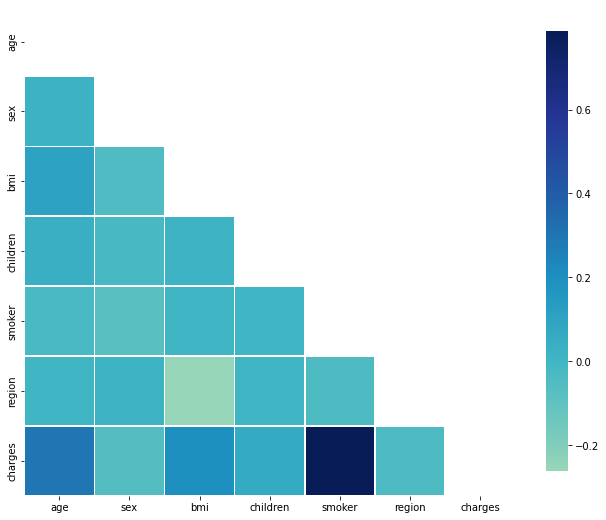

In [74]:
corr_Vars(ins)
#https://www.relataly.com/stock-market-correlation-matrix-in-python/103/

In [75]:
def relationshipHorizontalChart(data, column, mainVar):
  data_sorted = data.sort_values(by='column', ascending=False)
  data_sorted['column'] = data_sorted['column'] / 1000000
  pd.options.display.float_format = '{:,.0f}'.format
  data_sorted.set_index('mainVar', inplace=True)
  ranking = data_sorted.head(10)
  ranking
  ranking.sort_values(by='column', inplace=True, ascending=True)
  fig, ax = plt.subplots(figsize=(10,6), facecolor=(.94, .94, .94))
  mpl.pyplot.viridis()

  index = ranking.index
  values = ranking['column']            
  bar = ax.barh(index, values)
  plt.tight_layout()
  ax.xaxis.set_major_formatter(mpl.ticker.StrMethodFormatter('{x:,.0f}'))

In [76]:
def relationshipBoxplot(data, y_label, vars=[], title = [""]):
  sns.set(style='whitegrid')
  facecolor = '#eaeaf2'
  fig, ax = plt.subplots(figsize=(10, 6), facecolor=facecolor)
  ax = sns.boxplot(data=data, 
                 palette='Set3', 
                 linewidth=1.2, 
                 fliersize=2, 
                 order= vars,
                 flierprops=dict(marker='o', markersize=4))
  font_color = '#525252'


  ax.set_ylabel('y_label', fontsize=16, color=font_color)
  for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set(fontsize=16, color=font_color)
    title = title
  fig.suptitle(title, y=.97, fontsize=22, color=font_color)
  plt.subplots_adjust(top=0.85)
            
  for i, box in enumerate(ax.artists):
    col = box.get_facecolor()
    plt.setp(ax.lines[i*6+5], mfc=col, mec=col)
    lines = ax.get_lines()
  categories = ax.get_xticks()

  for cat in categories:
    y = round(lines[4+cat*6].get_ydata()[0],1) 
    ax.text(
        cat, 
        y, 
        f'{y}', 
        ha='center', 
        va='center', 
        fontweight='semibold', 
        size=12,
        color='white',
        bbox=dict(facecolor='#828282', edgecolor='#828282')
    )
    

In [77]:
def relationshipPlot(data, x_var, y_var, hue):
  g = sns.relplot(x=x_var, 
            y=y_var, 
            hue=hue, 
            data=data,
            sizes=(40, 400), 
            alpha=.7, 
            palette='muted', 
            height=8, 
            aspect=8/8)
                        
  plt.subplots_adjust(top=0.85)
  plt.setp(g._legend.get_texts(), fontsize='16')

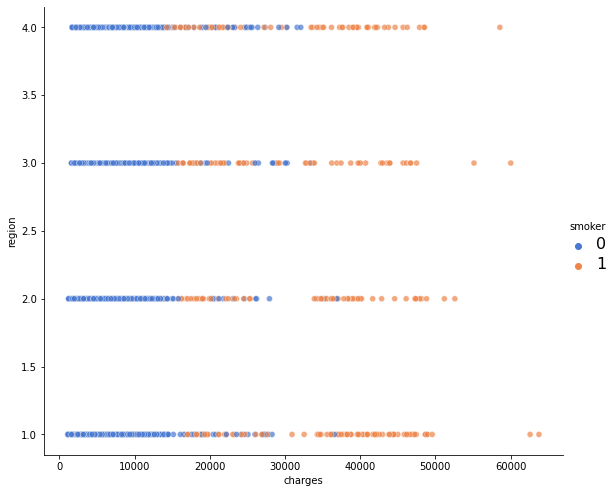

In [78]:
relationshipPlot(ins, ins.charges, ins.region, ins.smoker)

In [79]:
def normalizeData(data, column):
    #scaledData = data.copy()
    data[column] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())    
    display(data)
    

In [100]:
normalizeData(ins, ["charges", "bmi","age","children"])


,age,sex,bmi,children,smoker,region,charges
0,0.021739,1,0.321227,0.0,1,2,0.251611
1,0.000000,0,0.479150,0.2,0,1,0.009636
2,0.217391,0,0.458434,0.6,0,1,0.053115
3,0.326087,0,0.181464,0.0,0,3,0.333010
4,0.304348,0,0.347592,0.0,0,3,0.043816
...,...,...,...,...,...,...,...
1333,0.695652,0,0.403820,0.6,0,3,0.151299
1334,0.000000,1,0.429379,0.0,0,4,0.017305
1335,0.000000,1,0.562012,0.0,0,1,0.008108
1336,0.065217,1,0.264730,0.0,0,2,0.014144


In [101]:
ins.sort_values(by=['charges'])

,age,sex,bmi,children,smoker,region,charges
940,0.000000,0,0.195050,0.0,0,1,0.000000
808,0.000000,0,0.381490,0.0,0,1,0.000154
1244,0.000000,0,0.467312,0.0,0,1,0.000225
663,0.000000,0,0.476190,0.0,0,1,0.000232
22,0.000000,0,0.488028,0.0,0,1,0.000242
...,...,...,...,...,...,...,...
819,0.326087,1,0.526500,0.0,1,3,0.862167
577,0.282609,1,0.595507,0.2,1,4,0.917008
1230,0.739130,0,0.498386,0.6,1,3,0.940158
1300,0.586957,0,0.387409,0.0,1,1,0.981204


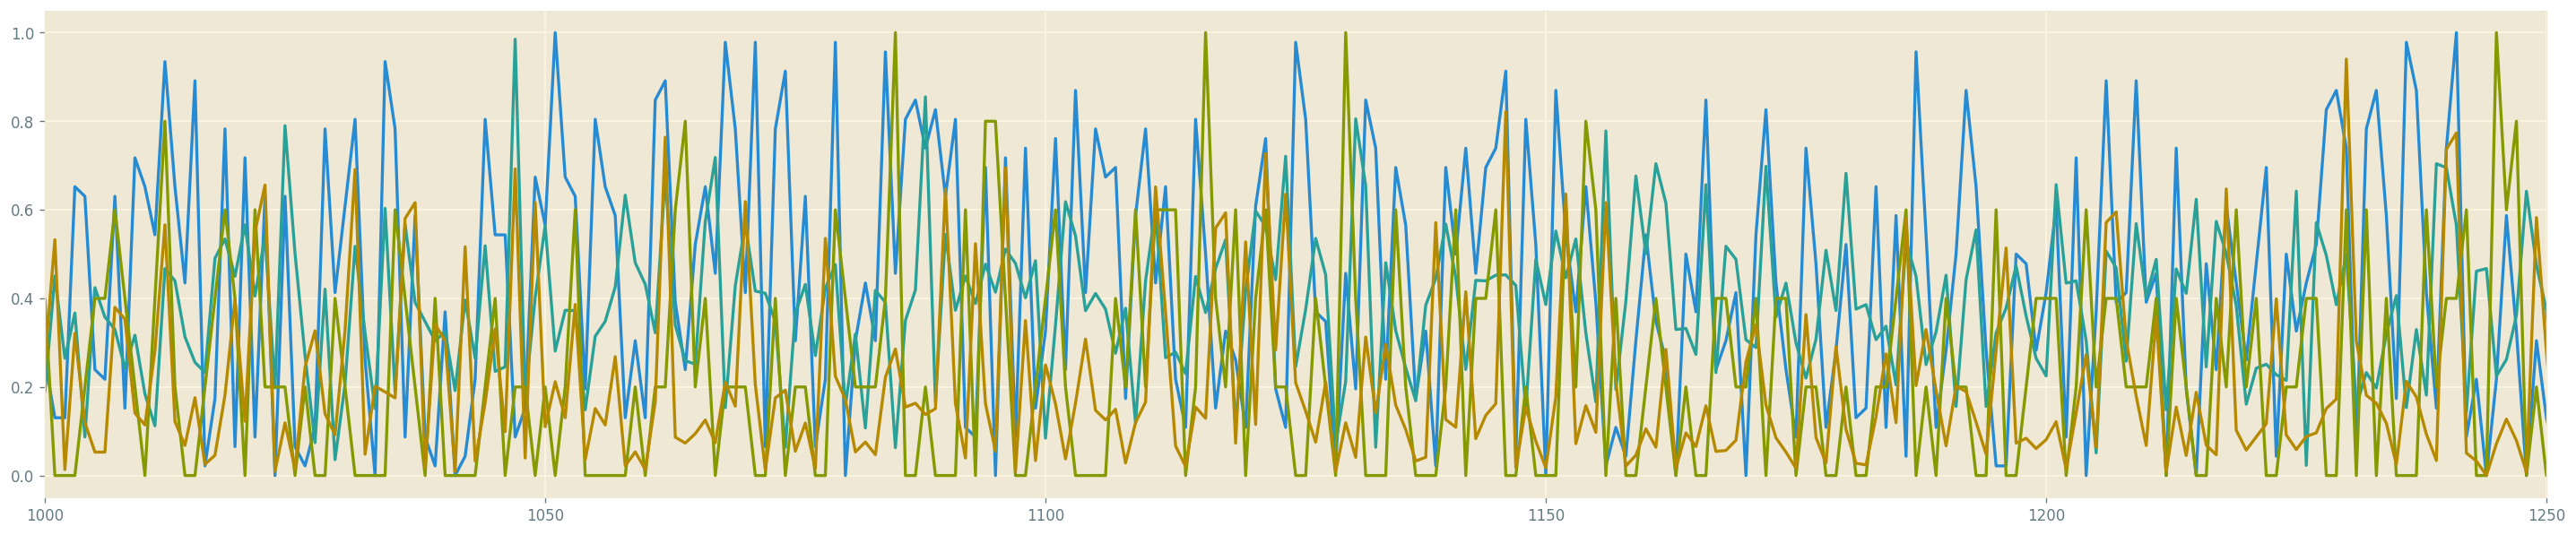

In [115]:

from matplotlib.pyplot import figure

figure(figsize=(30, 6), dpi=120)

with plt.style.context('Solarize_Light2'):
   plt.plot(ins['age'])
   plt.plot(ins['bmi'])
   plt.plot(ins['children'])
   plt.plot(ins['charges'])

   
plt.xlim([1000, 1250])

plt.show();

In [137]:
y = ins["charges"]
X = ins.drop(["charges"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X.shape)
print(y.shape)

(1338, 6)
(1338,)


In [138]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
# X_train = X_train.reshape(1,-1)
# X_test = X_test.reshape(1,-1)
# y_train = y_train.reshape(1,-1)
# y_test = y_test.reshape(1,-1)
regr_1.fit(X_train,y_train)
regr_2.fit(X_train,y_train)


DecisionTreeRegressor(max_depth=5)

In [144]:
y_1 = regr_1.predict(X_train)
y_2 = regr_2.predict(X_train)

print(X_train.shape)
print(y_train.shape)


(1070, 6)
(1003,)


In [140]:

y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)

In [145]:
from sklearn.linear_model import LinearRegression
x_train,x_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state = 0)
lr = LinearRegression().fit(x_train,y_train)

y_train_pred = lr.predict(x_train)
y_test_pred = lr.predict(x_test)
print(lr.score(x_test,y_test))

0.7997968412556061


In [146]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 4)
print('Uygun parametreler:\n')
print(rf.get_params())

Uygun parametreler:

{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 'auto', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_jobs': None, 'oob_score': False, 'random_state': 4, 'verbose': 0, 'warm_start': False}


In [189]:

##Çok uzun sürüyor.

# rf = RandomForestRegressor()

# print(rf.get_params().keys())

# params_rf = {"n_estimators" : [100, 200, 500, 1000],
#              "bootstrap" : [True, False],
#              "max_features" : [2, 3, 4, 5],
#              "min_samples_leaf": [1, 2, 4],
#              "min_samples_split": [2, 5, 7, 10],
#              "random_state":[4]}

# grid_rf = GridSearchCV(estimator=rf, param_grid=params_rf, cv=4, verbose=2, n_jobs = -1)
# grid_rf.fit(X=X_train, y=y_train)

In [159]:
#print( grid_rf.best_params_)

{'bootstrap': True, 'max_features': 2, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 500, 'random_state': 4}


In [185]:

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
rf_ = RandomForestRegressor(n_estimators = 100,
                              bootstrap = True,
                              criterion = 'squared_error',
                              random_state = 4)
rf_.fit(x_train,y_train)
forest_train_pred = rf_.predict(x_train)
forest_test_pred = rf_.predict(x_test)

print('MSE X_train: %.3f, MSE X_TE: %.3f' % (
mean_squared_error(y_train,forest_train_pred),
mean_squared_error(y_test,forest_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,forest_train_pred),
r2_score(y_test,forest_test_pred)))



MSE X_train: 0.001, MSE X_TE: 0.005
R2 train data: 0.974, R2 test data: 0.876


In [190]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(random_state = 4)
print('Uygun parametreler:\n')
print(dt.get_params())

Uygun parametreler:

{'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 4, 'splitter': 'best'}


In [197]:
dt = DecisionTreeRegressor()

print(dt.get_params().keys())

params_dt = {"min_samples_leaf": [1, 2, 4],
             "min_samples_split": [2, 4, 10],
             "random_state":[4]}

grid_dt = GridSearchCV(estimator=dt, param_grid=params_dt, cv=4, verbose=2, n_jobs = -1)
grid_dt.fit(X=X_train, y=y_train)

dict_keys(['ccp_alpha', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])
Fitting 4 folds for each of 9 candidates, totalling 36 fits


GridSearchCV(cv=4, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 4, 10], 'random_state': [4]},
             verbose=2)

In [198]:
print( grid_dt.best_params_)

{'min_samples_leaf': 4, 'min_samples_split': 10, 'random_state': 4}


In [200]:
dt_ = DecisionTreeRegressor(  min_samples_leaf = 4,
                              min_samples_split= 10,
                              criterion = 'squared_error',
                              random_state = 4)
dt_.fit(x_train,y_train)
dtree_train_pred = dt_.predict(x_train)
dtree_test_pred = dt_.predict(x_test)

print('MSE X_train: %.3f, MSE X_TE: %.3f' % (
mean_squared_error(y_train,dtree_train_pred),
mean_squared_error(y_test,dtree_test_pred)))
print('R2 train data: %.3f, R2 test data: %.3f' % (
r2_score(y_train,dtree_train_pred),
r2_score(y_test,dtree_test_pred)))

MSE X_train: 0.003, MSE X_TE: 0.007
R2 train data: 0.911, R2 test data: 0.829


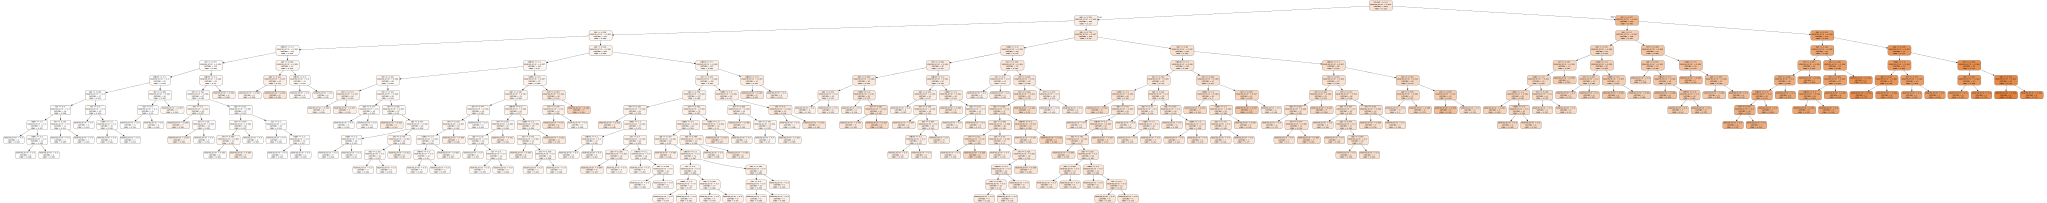

In [209]:
from sklearn.tree import export_graphviz
from sklearn import tree

from graphviz import Source
from sklearn import tree
Source(tree.export_graphviz(dt_, out_file=None, feature_names=X.columns))

              
from IPython.display import SVG
graph = Source( tree.export_graphviz(dt_, out_file=None, filled= True, rounded = True, feature_names=X.columns))
SVG(graph.pipe(format='svg'))